In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

tf.__version__

'1.12.0'

In [2]:
df = pd.DataFrame.from_csv('data/onehot_encoded.csv')

/home/ycb_stm/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


In [3]:
y = df.chosen
x = df.drop('chosen', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.09)

In [4]:
x_train.shape

(47320, 15)

In [5]:
y_train.shape

(47320,)

In [6]:
x_test.shape

(4680, 15)

In [7]:
y_test.shape

(4680,)

In [8]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.leaky_relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(6, activation = tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train.values, y_train.values, validation_split=0.33, epochs=100, batch_size=10, verbose=1)

Train on 31704 samples, validate on 15616 samples
Epoch 1/100
31704/31704 [==============================] - 5s 146us/step - loss: 5.2683 - acc: 0.6024 - val_loss: 0.5165 - val_acc: 0.8163
Epoch 2/100
31704/31704 [==============================] - 4s 141us/step - loss: 0.5238 - acc: 0.8067 - val_loss: 0.5610 - val_acc: 0.7798
Epoch 3/100
31704/31704 [==============================] - 4s 138us/step - loss: 0.4841 - acc: 0.8134 - val_loss: 0.4644 - val_acc: 0.8220
Epoch 4/100
31704/31704 [==============================] - 5s 151us/step - loss: 0.4715 - acc: 0.8142 - val_loss: 0.4608 - val_acc: 0.8113
Epoch 5/100
31704/31704 [==============================] - 5s 156us/step - loss: 0.4605 - acc: 0.8175 - val_loss: 0.4596 - val_acc: 0.8240
Epoch 6/100
31704/31704 [==============================] - 5s 165us/step - loss: 0.4554 - acc: 0.8193 - val_loss: 0.4808 - val_acc: 0.8113
Epoch 7/100
31704/31704 [==============================] - 5s 149us/step - loss: 0.4554 - acc: 0.8172 - val_loss: 0.

31704/31704 [==============================] - 4s 136us/step - loss: 0.4103 - acc: 0.8379 - val_loss: 0.3954 - val_acc: 0.8523
Epoch 60/100
31704/31704 [==============================] - 4s 135us/step - loss: 0.4102 - acc: 0.8405 - val_loss: 0.3963 - val_acc: 0.8487
Epoch 61/100
31704/31704 [==============================] - 4s 136us/step - loss: 0.4115 - acc: 0.8393 - val_loss: 0.4557 - val_acc: 0.8181
Epoch 62/100
31704/31704 [==============================] - 5s 143us/step - loss: 0.4098 - acc: 0.8405 - val_loss: 0.4100 - val_acc: 0.8385
Epoch 63/100
31704/31704 [==============================] - 5s 147us/step - loss: 0.4104 - acc: 0.8395 - val_loss: 0.4578 - val_acc: 0.8178
Epoch 64/100
31704/31704 [==============================] - 5s 152us/step - loss: 0.4081 - acc: 0.8418 - val_loss: 0.4106 - val_acc: 0.8468
Epoch 65/100
31704/31704 [==============================] - 6s 181us/step - loss: 0.4106 - acc: 0.8380 - val_loss: 0.4048 - val_acc: 0.8387
Epoch 66/100
31704/31704 [=======

In [9]:
val_loss, val_acc = model.evaluate(x_test, y_test)

4680/4680 [==============================] - 0s 14us/step


In [10]:
print(val_loss, val_acc)

0.4128681292900672 0.8508547008547008


In [11]:
model.save_weights('data/sorting_algorithm_chooser.model')


Consider using a TensorFlow optimizer from `tf.train`.


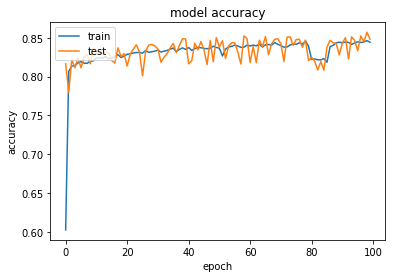

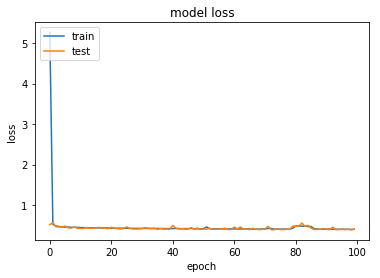

In [12]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()